## Web Crawling throuh BeautifulSoup and Wordcloud

In [1]:
import nltk
from bs4 import  BeautifulSoup
import urllib as ul
import re, time
import numpy as np

In [2]:
init = 'http://www.imdb.com/title/tt4169250/reviews?start='
N = 5
total_reviews = []
page = 0
next_page = 0

while page <= N:
    doc = ul.request.urlopen(init+str(next_page))
    bsObj = BeautifulSoup(doc, 'lxml')
    reviews = bsObj.find('div',attrs = {'id':'tn15content'}).find_all('p')
    reviews = [re.sub("<[^<]+>","",str(rev)) for rev in reviews] # Remove any tag
    reviews = [re.sub("(\n)"," ",rev) for rev in reviews] # Remove new line character
    
    [total_reviews.append(rev) for rev in reviews]
    
    next_page = next_page + 10
    page = page +1
    time.sleep(3)
# Remove the warnings and other one line remarks
total_reviews = [rev for rev in total_reviews if len(rev)>40]

In [3]:
total_reviews

[' "Absolutely magnificent, Dhoni,finishes off in-style, A magnificent stroke into the crowd! India lift the world cup, After 28 years , The party started in the dressing room. and, Its an Indian captain who\'s been absolutely magnificent in the night of the final." Pretty much one of the best moments of the movie. Massive goosebumps. Ms Dhoni The Untold Story - Is a fantastically made movie which is like two sides of the same coin. The first half which shows why Neeraj Pandey is one of the best directors in the country. While the second half shows why Neeraj Pandey should never make a love story. The movie\'s main strength is clearly Sushant Singh Rajput who shines in every scene. He has captured the essence of the calm and composed Dhoni and portrayed it brilliantly. The first of the movie is stunning, brilliantly acted, poor special effects with some great dialogues and excellent direction by Neeraj Pandey. The cricketing aspect of Dhoni is so well done. It shows that there is alway

In [4]:
len(total_reviews)

60

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [6]:
review_all_text = ""
for rev in total_reviews:
    review_all_text = review_all_text + rev

In [7]:
wc = WordCloud(background_color = 'white',max_words = 200,stopwords = STOPWORDS.add('said'),
               scale=1.5,max_font_size=40,min_font_size=1)
wc.generate(review_all_text)

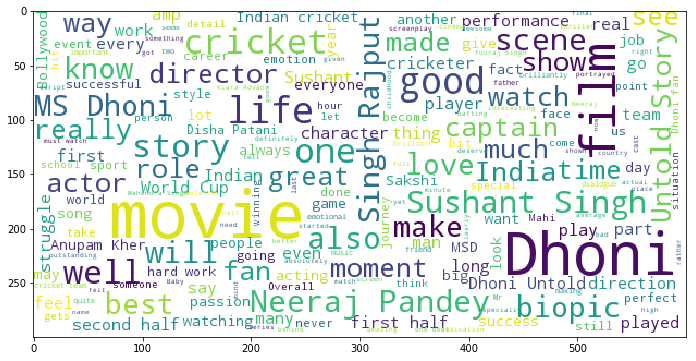

In [9]:
plt.figure(figsize=(12,6))
plt.imshow(wc)

## Extracting Ratings and Reviews from IMDB

In [11]:
def extract_rates(inp):
    rates = []
    for i in [0,2,4,6,8,10,12,14,16,18]:
        try:
            rate = inp[i].find_all('img')[1].get('alt')
            rates.append(rate)
        except:
            rates.append(np.NaN)
    return(rates)

init = 'http://www.imdb.com/title/tt0111161/reviews?start='
N = 30
total_reviews = []
total_ratings = []
page = 1
next_page = 0

while page <= N:
    doc = ul.request.urlopen(init+str(next_page))
    bsObj = BeautifulSoup(doc, 'lxml')
    reviews = bsObj.find('div',attrs = {'id':'tn15content'}).find_all('p')
    reviews = [rev.text for rev in reviews] # Remove any tag
    reviews = [re.sub("(\n)"," ",rev) for rev in reviews] # Remove new line character
    #print(len(reviews))
    print(len([rev for rev in reviews if len(rev)>40]))
    
    [total_reviews.append(rev) for rev in reviews]
    
    x = bsObj.find('div',attrs = {'id':'tn15content'}).findChildren('div')
    ratings = extract_rates(x)
    print(len(ratings))
    [total_ratings.append(rating) for rating in ratings]    
    
    next_page = next_page + 10
    page = page +1
    time.sleep(3)

10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10


In [12]:
total_reviews_filtered = [rev for rev in total_reviews if len(rev)>40]
import pandas as pd
dataset = pd.DataFrame({"Reviews": total_reviews_filtered, "Ratings": total_ratings})

In [13]:
dataset.head(10)

,Ratings,Reviews
0,10/10,Why do I want to write the 234th comment on T...
1,10/10,"Can Hollywood, usually creating things for e..."
2,NaN,I have never seen such an amazing film since...
3,10/10,"In its Oscar year, Shawshank Redemption (writ..."
4,NaN,The reason I became a member of this database...
5,8/10,I believe that this film is the best story e...
6,10/10,One of my all time favorites. Shawshank Rede...
7,10/10,One of the finest films made in recent years...
8,10/10,Misery and Stand By Me were the best adaptati...
9,10/10,This movie is not your ordinary Hollywood fli...
